In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# read data

# dataset
## import datetime
dt = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\datetime.csv', delimiter=';')
#Time

## import variables
df = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\trekantenEMA01_ffill.csv', delimiter=';')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Time'], axis=1)

df.tail()

,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,temperature_c2.2,...,exp_valve_c2,superheat_c1,superheat_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
787616,9.8,12.3,30.1,37.9,34.1,30.6,31.1,17.6,77.50,39.05,...,53.0,4.15,10.70,40.0,0.0,37.0,23.3,11.1,10.7,7.7
787617,9.4,11.9,30.1,38.0,34.1,30.6,31.1,17.6,78.15,39.80,...,54.5,4.60,9.30,40.0,0.0,37.2,24.4,10.8,10.7,7.9
787618,8.9,11.4,30.1,37.7,34.1,30.6,31.1,17.6,77.70,39.45,...,55.5,5.20,9.20,40.0,0.0,37.6,23.1,10.6,10.7,7.7
787619,8.3,10.7,30.4,38.2,34.4,30.6,31.4,17.6,77.70,40.00,...,55.0,6.20,8.25,40.0,0.0,37.6,24.2,10.3,10.7,7.9
787620,7.1,9.6,30.1,37.9,34.4,30.6,31.4,17.6,76.80,39.50,...,55.0,7.50,7.70,40.0,0.0,37.6,23.4,9.9,10.4,7.6


In [4]:
dt = pd.to_datetime(dt['Time'], format='%Y-%m-%d %H:%M:%S')
dt = dt[:787621]
dt.tail()

787616   2021-06-30 23:56:00
787617   2021-06-30 23:57:00
787618   2021-06-30 23:58:00
787619   2021-06-30 23:59:00
787620   2021-07-01 00:00:00
Name: Time, dtype: datetime64[ns]

In [5]:
titles = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'superheat_c1', 'superheat_c2', 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1', 'pressure_t1.c1', 'pressure_t2.c1', 'pressure_t1_c2', 'pressure_t2.c2']
selected_titles = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1', 'pressure_t1.c1', 'pressure_t2.c1', 'pressure_t1_c2', 'pressure_t2.c2']

In [6]:
#df = df[selected_titles][:527041]
#dt = dt[:527041]

df = df[selected_titles][:100000]
dt = dt[:100000]

In [7]:
#df = df[selected_titles][:27041]
#dt = dt[:27041]

In [8]:
dataset = pd.concat([dt,df], axis = 1)
dataset.head()

,Time,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,...,water_flow_c1,exp_valve_c1,exp_valve_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
0,2020-01-01 00:00:00,4.6,7.3,37.7,43.1,85.900000,42.30,14.411111,7.5,85.277778,...,40.0,32.0,31.0,100.0,14.5,32.6,24.9,5.9,24.8,5.9
1,2020-01-01 00:01:00,4.6,7.3,37.8,43.1,85.922222,42.30,14.555556,7.5,85.188889,...,40.0,32.0,31.0,100.0,14.6,32.6,24.9,5.9,24.8,5.9
2,2020-01-01 00:02:00,4.6,7.3,37.7,43.1,86.000000,42.35,14.512500,7.5,85.125000,...,40.0,32.0,31.0,100.0,14.6,32.7,24.9,5.9,24.8,5.9
3,2020-01-01 00:03:00,4.6,7.3,37.8,43.1,85.880000,42.34,14.510000,7.5,85.200000,...,40.0,32.0,30.9,100.0,14.5,32.7,24.9,5.9,24.8,5.9
4,2020-01-01 00:04:00,4.6,7.3,37.8,43.1,85.950000,42.30,14.425000,7.5,85.287500,...,40.0,32.0,31.0,100.0,14.5,32.7,24.9,5.9,24.8,5.9


In [9]:
feature_keys = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2', 'temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3',	'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3',	'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2']#, 'superheat_c1', 'superheat_c2']

title = ['°C','°C','°C','°C','°C','°C','°C','°C','°C','°C','°C','°C', 'Status', 'Status', 'Status', 'Status', '%', '%', '%', '%']#, 'K', 'K']

date_time = 'Time'

def visualization(data):
    time_data = data[date_time]
    fig, axes = plt.subplots(
        nrows=10, ncols=2, figsize=(15,20), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax = axes[i//2,i%2],
            title ='{}-{}'.format(title[i], key),
            rot = 25,
        )
        ax.legend([title[i]])
    plt.tight_layout()

#visualization(dataset)

In [10]:
#input
df_input =df[['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2']]#, 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1']]

df_output = df[['pressure_t2.c1']]

df_window = df[['C1a', 'C1b', 'C2a', 'C2b']]

## all inputs and outputs together
df = pd.concat([df_input, df_output], axis = 1)
df.head()


,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,water_flow_c2,water_flow_c1,exp_valve_c1,exp_valve_c2,pressure_t2.c1
0,4.6,7.3,37.7,43.1,50.0,40.0,32.0,31.0,5.9
1,4.6,7.3,37.8,43.1,50.0,40.0,32.0,31.0,5.9
2,4.6,7.3,37.7,43.1,50.0,40.0,32.0,31.0,5.9
3,4.6,7.3,37.8,43.1,50.0,40.0,32.0,30.9,5.9
4,4.6,7.3,37.8,43.1,50.0,40.0,32.0,31.0,5.9


In [11]:
## define the loc of datetime when C1a is on
#loc_1a = []
#loc_1a = df.iloc(df.C1a.value == 1)
#datetime_1a = dataset['Time'][loc_1a]

In [12]:
def create_dataset(dataset, look_back = 1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 8]) # my output variable
    return np.array(X), np.array(Y)

In [13]:
# fix random seed for reproducibility

np.random.seed(7)

In [14]:
# normalize data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features = scaler.fit_transform(df)


print(features)

[[0.52142857 0.875      0.71495327 ... 0.48484848 0.38794084 0.23255814]
 [0.52142857 0.875      0.71962617 ... 0.48484848 0.38794084 0.23255814]
 [0.52142857 0.875      0.71495327 ... 0.48484848 0.38794084 0.23255814]
 ...
 [0.5        0.81944444 0.5        ... 0.83333333 0.         0.41860465]
 [0.5        0.81944444 0.5        ... 0.83333333 0.         0.41860465]
 [0.5        0.81944444 0.5        ... 0.84848485 0.         0.41860465]]


In [15]:
# split the data
feature_size = len(features)
train_size = int(len(features)*0.65)
test_size = len(features) - train_size
train, test = features[0:train_size, :], features[train_size:len(features),:]
print(len(train), len(test))

65000 35000


In [ ]:
# C1a
c1a_window = df_window['C1a'] == 1
print(c1a_window)

# C1b
c1b_window = df_window['C1b'] == 1
print(c1b_window)

# C2a
c2a_window = df_window['C2a'] == 1
print(c2a_window)

# C2b
c2b_window = df_window['C2b'] == 1
print(c2b_window)

In [ ]:
#for columns in df_window:
#    compressor = df_window[columns]
#    print('Column Name: ', compressor.name)

for columns in df_window:
        y = df_window[columns]
        #print(y)
        x = np.where(y == 1)
        #print(x)

def window_size(z):
        z = len(x)
        return z

window_size(df_window)

In [ ]:
## define the loc of datetime when C1a is on
#loc_C1a = []
#loc_C1a = np.where(df_window['C1a'] == 1)
#print(loc_C1a)

#loc_C1b = []
#loc_C1b = np.where(df_window['C1b'] == 1)
#print(loc_C1b)

#loc_C2a = []
#loc_C2a = np.where(df_window['C2a'] == 1)
#print(loc_C2a)

#loc_C2b = []
#loc_C2b = np.where(df_window['C2b'] == 1)
#print(loc_C2b)

In [16]:
## only pressure t1.c2
#dataset = features.pressure_t1_c2.values
#dataset = dataset.astype('float32')
#dataset = np.reshape(dataset, (-1, 1))
#print(dataset)

#train_size = int(len(dataset)*0.8)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [17]:
# reshape into X = t and Y = t+1

look_back = 720 # half a day
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)


In [18]:
print(X_test.shape)

(34279, 720, 9)


In [19]:
print(Y_test)

[0.88372093 0.90697674 0.90697674 ... 0.41860465 0.41860465 0.41860465]


In [20]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 9))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 9))


In [ ]:
# BASELINE MODEL
from sklearn.metrics import mean_squared_error, mean_absolute_error

def baseline_model(x):
  return x

predictions = list()
for x in X_test[:,1,8]:
  y = baseline_model(x)
  predictions.append(y)

#print(predictions)
test_score = mean_squared_error(Y_test, predictions)
print('Test MSE: %.3f' % test_score)

#plt.plot(Y_train)
plt.plot([None for i in Y_train] + [x for x in Y_test])
plt.plot([None for i in Y_train] + [x for x in predictions])
plt.title('baseline simulations for pressure t2.c1')
plt.ylabel('bar')
plt.xlabel('time step')
plt.legend(['observation', 'baseline simulation'], loc='upper right')
plt.show()


In [ ]:
# MODEL 01
# simple LSTM example with all variables input

model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(4, input_dim = 9),
    tf.keras.layers.Dense(1)
])

model_lstm.compile(loss = 'mean_squared_error', optimizer = 'adam')

model_lstm.summary()

history = model_lstm.fit(X_train, Y_train, validation_split = 0.33, epochs = 50, batch_size = 32)

In [21]:
# MODEL 02
model_01 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, strides=1, padding='causal', activation='relu', input_shape = [None, 9]),
    tf.keras.layers.LSTM(32),# return_sequences=True),
    #tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1),
])

#lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode ='min') # EarlyStopping min_delta = 0 or mode='min'
"""
EarlyStopping class: stop training when a monitored metric has stopped improving.

min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
"""

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_01.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=["mae"])

model_01.summary()

history = model_01.fit(X_train, Y_train, 
                    epochs=50, #100, 
                    validation_split = 0.33,
                    callbacks=[es_callback]
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          1472      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 9,825
Trainable params: 9,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1346/1346 [==============================] - 289s 214ms/step - loss: 0.0053 - mae: 0.0375 - val_loss: 0.0029 - val_mae: 0.0325
Epoch 2/50
1346/1346 [==============================] - 272s 202ms/step - loss: 0.0022 - mae: 0.0241 - val_loss: 0.0029 - val_mae: 0.0364
Epoch 3/50
1346/1346 [==============================] - 278s 207ms/step - loss: 0.0018 - mae: 0.0221 - val_l

In [ ]:
# OPTIONAL MODEL 03

model = tf.keras.models.Sequential([
    #tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(128, input_dim = 9, return_sequences = True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = ['accuracy']
)

model.summary()

history = model.fit(X_train,
                    Y_train,
                    epochs = 50, #100,
                    validation_data = (X_test,Y_test),
                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, min_delta = 0)]
)

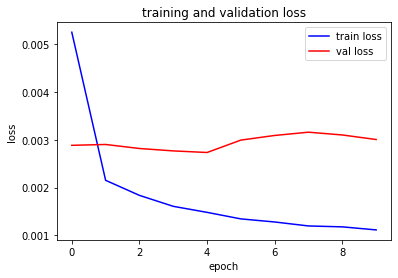

final val loss:  [0.0028855411801487207, 0.002903154119849205, 0.0028189250733703375, 0.0027686499524861574, 0.0027350811287760735, 0.0029949797317385674, 0.0030923548620194197, 0.0031607255805283785, 0.0031023540068417788, 0.0030073157977312803]


In [22]:
# visualize the losses 

def visualize_loss(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, 'b', label='train loss')
    plt.plot(epochs, val_loss, 'r', label='val loss')
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    print('final val loss: ', val_loss)

visualize_loss(history, 'training and validation loss')

In [23]:
# make predictions

trainPrediction = model_lstm.predict(X_train)
#trainPrediction = model.predict(X_train)
print(trainPrediction)

#testPrediction = model.predict(X_test)
testPrediction = model_lstm.predict(X_test)
print(testPrediction)

NameError: name 'model_lstm' is not defined

In [ ]:
# need to transform the predictions back from normalization

# get something which has as many features as dataset
trainPrediction_extended = np.zeros((len(trainPrediction), 9))
# Put the predictions there
trainPrediction_extended[:,8] = trainPrediction[:,0]
# inverse transform it and select the last column
trainPrediction = scaler.inverse_transform(trainPrediction_extended)[:,8]
print(trainPrediction)

# get something which has as many features as dataset
testPrediction_extended = np.zeros((len(testPrediction), 9))
# Put the predictions there
testPrediction_extended[:,8] = testPrediction[:,0]
# inverse transform it and select the last column
testPrediction = scaler.inverse_transform(testPrediction_extended)[:,8]
print(testPrediction)

In [ ]:
print(len(testPrediction))
#print(len(testPredictionPlot))

In [ ]:
Y_train_exteded =np.zeros((len(Y_train), 9))
Y_train_exteded[:,8] = Y_train
Y_train = scaler.inverse_transform(Y_train_exteded)[:,8]

Y_test_exteded =np.zeros((len(Y_test), 9))
Y_test_exteded[:,8] = Y_test
Y_test = scaler.inverse_transform(Y_test_exteded)[:,8]


In [ ]:
# shift train predictions for plotting
trainPredictionPlot = np.empty_like(features)
trainPredictionPlot[:, :] = np.nan
trainPredictionPlot[look_back:len(trainPrediction)+look_back, 8] = trainPrediction

# shift test predictions for plotting
testPredictionPlot = np.empty_like(features)
testPredictionPlot[:, :] = np.nan
testPredictionPlot[len(trainPrediction)+(look_back*2) +1:len(features)-1, 8] = testPrediction


In [ ]:
# plot original

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(features)[:,8])
#plt.plot(scaler.inverse_transform(features[train_size:])[:,8], linestyle = '-')  
plt.plot(trainPredictionPlot, 'r', linestyle='--', alpha = 0.4)  
plt.plot(testPredictionPlot, 'pink', linestyle='--', alpha = 0.6)
plt.title('pressure t2.c1')
plt.ylabel('bar')
plt.xlabel('time step')
plt.legend(['observation','simulation'], loc='upper right')


In [ ]:
# plot original
zoom = 80000
end = 82000

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(features)[:,8][zoom:end])
#plt.plot(scaler.inverse_transform(features[train_size:])[:,8], linestyle = '-')  
plt.plot(trainPredictionPlot[zoom:end], 'r', linestyle='--', alpha = 0.4)  
plt.plot(testPredictionPlot[zoom:end], 'pink', linestyle='--', alpha = 0.7)
plt.title('pressure t2.c1')
plt.ylabel('bar')
plt.xlabel('time step')
plt.legend(['observation','simulation'], loc='upper right')